# 1.Simple Linear Regression
## Y = &#593;<sub>0</sub> + b<sub>1</sub>X<sub>1</sub>
![alt text](./reg_photos/slr.png)

here, 
- **Y** is Dependent variable
- **&#593;<sub>0</sub>** is y-intercept(constant)
- **b<sub>1</sub>** is Slope coefficent
- **X<sub>1</sub>** is Independent variable
### <a href='https://www.youtube.com/watch?v=u2sKbCfviFw'> Learn Linear Regression</a>
---

We can draw multiple slope lines through our data points, <br>how do we Know Which Slope line is the best. we can use, 
### Ordinary least Squares
- An optimization strategy that helps you find a straight line as close as possible to your data points in a linear regression model.
- help you find unbiased real value estimates for your alpha and beta.
- <a href="https://youtu.be/SnONtEma98o">Learn OLS </a>
 

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Catogarising dataset into dependent and independet variable
<br>splitting the data set into test & trainnig set.

In [108]:
dataset = pd.read_csv("./reg_dataset/Salary_Data.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 0)

Using 'fit' & 'predict' methords from LinearRegresssion class, training the model.

In [110]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [111]:
results = regressor.predict(x_test)

# we predict the values by fitting the trainig set & compare it with dependent variable for test set
for i in range(len(results)):
    diff = abs(results[i]-y_test[i])
    print(f'{results[i]}   for  {y_test[i]} \t diff --> {round(diff,4)}')

40748.96184072196   for  37731.0 	 diff --> 3017.9618
122699.62295593883   for  122391.0 	 diff --> 308.623
64961.65717021785   for  57081.0 	 diff --> 7880.6572
63099.142144872014   for  63218.0 	 diff --> 118.8579
115249.56285455546   for  116969.0 	 diff --> 1719.4371
107799.50275317213   for  109431.0 	 diff --> 1631.4972


Visualising the **Training data set** 

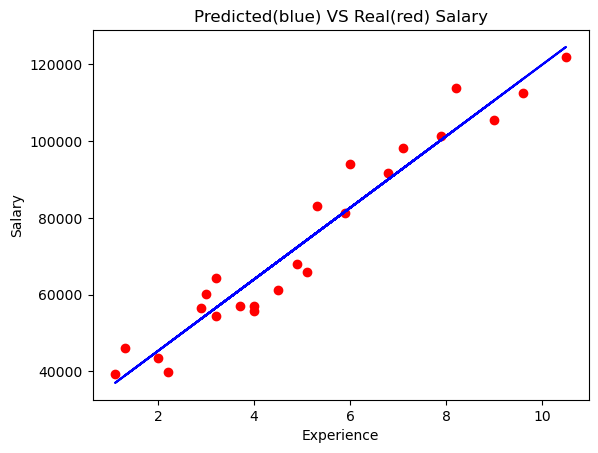

In [112]:
plt.scatter(x_train, y_train, color='red')

# Using a line to represent predicted data set
y_results = regressor.predict(x_train)
plt.plot(x_train, y_results, color='blue')

plt.title("Predicted(blue) VS Real(red) Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

Visualising the **Test set** 

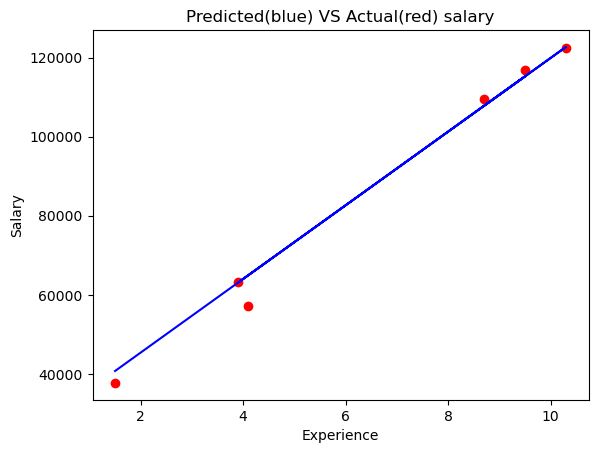

In [113]:
plt.scatter(x_test, y_test, color='red')

# Using a line to represent predicted data set
plt.plot(x_test, results, color='blue')

plt.title("Predicted(blue) VS Actual(red) salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

### Making a single prediction (for example the salary of an employee with 12 years of experience)

In [114]:
print(regressor.predict([[12]]))

[138531.00067138]


**Important note:** The "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

In [115]:
print(regressor.coef_)  # slope of the line
print(regressor.intercept_)

[9312.57512673]
26780.09915062818


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9345.94 \times \textrm{YearsExperience} + 26816.19$$
**$$\textrm{Y} = m \times \textrm{X} + c$$**

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

## Factors affecting Linear regression
1. **Linearity :** there should be linear relationship between 'X' & 'Y' (dependent and independent variables).

2. **Homoscedasticity :** (Equal Variance) variance of the residual, or error term is constant. That is, the error term does not vary much with change in predictor(independet) variable. ![Homoscedasticity](./reg_photos/homoscedasticityy.png)

3. There should not be **Multivariate Normality**, The Regression line should represent Normal distribution of data.![Multivariate Normality](./reg_photos/multivariate_normality.png)

4. **Multicollinearity :** The independent variables Should not be 'closley co-releated' to each other. 

5. **Independence :** There should be no relation between two observation.

6. **Outliers :** regression line dosen't represent Extream values in dataset, they are Extra. one can overcome there affects through Feature scaling or elimination.